# QTM 151 Final Project 
Rola Ke, Coco Zhang, Yuhan Wu

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


# Research Question 1

Are improvements in empowerment rights (freedom of speech, assembly, political participation) occurring alongside improvements in physical integrity rights (protection from violence), or are there trade-offs between the two dimensions over time? Among all countries, which ones demonstrate the greatest overall gains or losses in human rights (combining empowerment and physical integrity)? Furthermore, is the world collectively moving toward better protection of human rights, or are global trends showing stagnation or backsliding?

In [ ]:
# Load and clean data
df1 = pd.read_csv('csv files/cpr.csv')
df = df1[['country', 'year', 'physint_mean', 'empower_mean']].dropna()
df = df.sort_values(['country', 'year'])

# Standardize for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['physint_mean', 'empower_mean']])

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Assign labels to clusters
cluster_avg = df.groupby('cluster')[['physint_mean', 'empower_mean']].mean().sum(axis=1)
sorted_clusters = cluster_avg.sort_values().index.tolist()
label_map = {sorted_clusters[0]: 'Less Free', sorted_clusters[1]: 'Partially Free', sorted_clusters[2]: 'Free'}
df['freedom_status'] = df['cluster'].map(label_map)

# Setup color map
status_colors = {'Free': 'green', 'Partially Free': 'orange', 'Less Free': 'red'}

# Initialize figure
fig = go.Figure()

# Plot points with color-coded status
for status in df['freedom_status'].unique():
    subset = df[df['freedom_status'] == status]
    fig.add_trace(go.Scatter(
        x=subset['physint_mean'],
        y=subset['empower_mean'],
        mode='markers',
        name=status,
        marker=dict(color=status_colors[status], size=8, opacity=0.7),
        hovertext=subset['country'] + " (" + subset['year'].astype(str) + ")",
        hoverinfo='text'
    ))

# Add directional arrows (line segments with arrowheads)
for country in df['country'].unique():
    country_data = df[df['country'] == country].sort_values('year')
    for i in range(len(country_data) - 1):
        row_start = country_data.iloc[i]
        row_end = country_data.iloc[i + 1]
        color = 'gray'  # You can replace with logic to color-code arrows

        fig.add_annotation(
            x=row_end['physint_mean'],
            y=row_end['empower_mean'],
            ax=row_start['physint_mean'],
            ay=row_start['empower_mean'],
            xref='x', yref='y',
            axref='x', ayref='y',
            showarrow=True,
            arrowhead=4,
            arrowsize=1,
            arrowwidth=1.5,
            opacity=0.5,
            arrowcolor=color
        )

# Layout settings
fig.update_layout(
    title='Human Rights Change Over Time (Arrows = Yearly Transitions)',
    xaxis_title='Physical Integrity Mean',
    yaxis_title='Empowerment Mean',
    legend_title='Freedom Status',
    width=850,
    height=500,
    template='plotly_white'
)

fig.show()


In [ ]:
# Load and clean data
df1 = pd.read_csv('csv files/cpr.csv')
df = df1[['country', 'year', 'physint_mean', 'empower_mean']].dropna()
df = df.sort_values(['country', 'year'])

# Calculate year-over-year changes
df['physint_change'] = df.groupby('country')['physint_mean'].diff()
df['empower_change'] = df.groupby('country')['empower_mean'].diff()

# Drop NaNs (first year has no previous year to compare)
df_change = df.dropna(subset=['physint_change', 'empower_change'])

# Plot scatter plot
fig = px.scatter(
    df_change,
    x='physint_change',
    y='empower_change',
    hover_data=['country', 'year'],
    title='Scatter Plot of Yearly Changes: Physical Integrity vs Empowerment',
    labels={
        'physint_change': 'Change in Physical Integrity',
        'empower_change': 'Change in Empowerment'
    },
    width=850,
    height=600
)

fig.update_layout(
    template='plotly_white',
    xaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black'),
    yaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black')
)

fig.show()


In [ ]:
# Load and clean data
df1 = pd.read_csv('csv files/cpr.csv')
df = df1[['country', 'year', 'physint_mean', 'empower_mean']].dropna()
df = df.sort_values(['country', 'year'])

# Calculate year-over-year changes
df['physint_change'] = df.groupby('country')['physint_mean'].diff()
df['empower_change'] = df.groupby('country')['empower_mean'].diff()
df['total_change'] = df['physint_change'] + df['empower_change']

# Drop first-year rows (no previous year to compare)
df_change = df.dropna(subset=['total_change'])

# Group by year and calculate average change across all countries
yearly_avg = df_change.groupby('year')[['physint_change', 'empower_change', 'total_change']].mean().reset_index()

# Reshape to long format for plotting
long_avg = yearly_avg.melt(
    id_vars='year',
    value_vars=['physint_change', 'empower_change', 'total_change'],
    var_name='Index',
    value_name='Average Change'
)

# Rename for nicer labels
long_avg['Index'] = long_avg['Index'].map({
    'physint_change': 'Physical Integrity Change',
    'empower_change': 'Empowerment Change',
    'total_change': 'Total Combined Change'
})

# Create composite line chart
fig = px.line(
    long_avg,
    x='year',
    y='Average Change',
    color='Index',
    title='Average Global Year-to-Year Changes in Human Rights Scores',
    markers=True,
    labels={'year': 'Year', 'Average Change': 'Mean Yearly Change'},
    color_discrete_map={
        'Physical Integrity Change': 'blue',
        'Empowerment Change': 'orange',
        'Total Combined Change': 'green'
    },
    height=600,
    width=950
)

fig.update_layout(
    legend_title='Index Type',
    xaxis=dict(dtick=1),
    yaxis=dict(tickformat=".2f"),
    template='plotly_white'
)

fig.show()


In [ ]:
# Load and prepare data
df1 = pd.read_csv('csv files/cpr.csv')
df = df1[['country', 'year', 'physint_mean', 'empower_mean']].dropna()
df = df.sort_values(['country', 'year'])

# Composite score
df['total_score'] = df['physint_mean'] + df['empower_mean']

# Compute farthest-year difference
change_records = []

for country in df['country'].unique():
    country_df = df[df['country'] == country]
    first_year = country_df['year'].min()
    last_year = country_df['year'].max()
    first_score = country_df[country_df['year'] == first_year]['total_score'].values[0]
    last_score = country_df[country_df['year'] == last_year]['total_score'].values[0]
    change_records.append({
        'country': country,
        'start_year': first_year,
        'end_year': last_year,
        'start_score': first_score,
        'end_score': last_score,
        'score_change': last_score - first_score
    })

change_df = pd.DataFrame(change_records)

# Top 10 improvers and bottom 10 decliners
top_10 = change_df.sort_values('score_change', ascending=False).head(10)['country'].tolist()
bottom_10 = change_df.sort_values('score_change').head(10)['country'].tolist()

# Subset original data
df_top = df[df['country'].isin(top_10)]
df_bottom = df[df['country'].isin(bottom_10)]

# Plot: Top 10 Improvers
fig_top = px.line(
    df_top,
    x='year',
    y='total_score',
    color='country',
    title='Top 10 Most Improved Countries (Full Period)',
    markers=True,
    labels={'total_score': 'Human Rights Score', 'year': 'Year'},
    height=500,
    width=950
)

# Plot: Bottom 10 Decliners
fig_bottom = px.line(
    df_bottom,
    x='year',
    y='total_score',
    color='country',
    title='Bottom 10 Most Declined Countries (Full Period)',
    markers=True,
    labels={'total_score': 'Human Rights Score', 'year': 'Year'},
    height=500,
    width=950
)

# Show graphs
fig_top.show()
fig_bottom.show()

# Research Question 2

To what extent do LGBTQIA+ protections reflect broader civil and political rights in a country, and how do these relationships differ by region, income level, and over time.

To answer this research question, we'll examine:

1. How civil/political rights indicators (like freedom of expression, assembly, and political participation) might serve as proxies for LGBTQIA+ rights protections
2. Regional patterns in these rights
3. Changes over time
4. Relationships between different rights indicators

# Research Question 3

Are improvements in gender equality in education rights—measured by the gap between male and female education scores—occurring consistently across countries, or do persistent disparities remain over time? Is the world collectively progressing toward gender parity in education rights, or do global trends reveal uneven progress and enduring inequalities? How does the trajectory of gender equality in education rights in Asia compare to that of Europe?

In [45]:
file_path = 'csv files/esr_sex_disaggregated.csv'
df = pd.read_csv(file_path)

# Combine HiY and LMY education scores (use whichever is available)
df['Female_Edu_Score'] = df['LMY_Education_Female_IAScore'].combine_first(df['HiY_Education_Female_IAScore'])
df['Male_Edu_Score'] = df['LMY_Education_Male_IAScore'].combine_first(df['HiY_Education_Male_IAScore'])

# Drop rows with missing education scores
df = df.dropna(subset=['Female_Edu_Score', 'Male_Edu_Score'])

# Calculate Gender Gap
df['Gender_Gap'] = df['Male_Edu_Score'] - df['Female_Edu_Score']

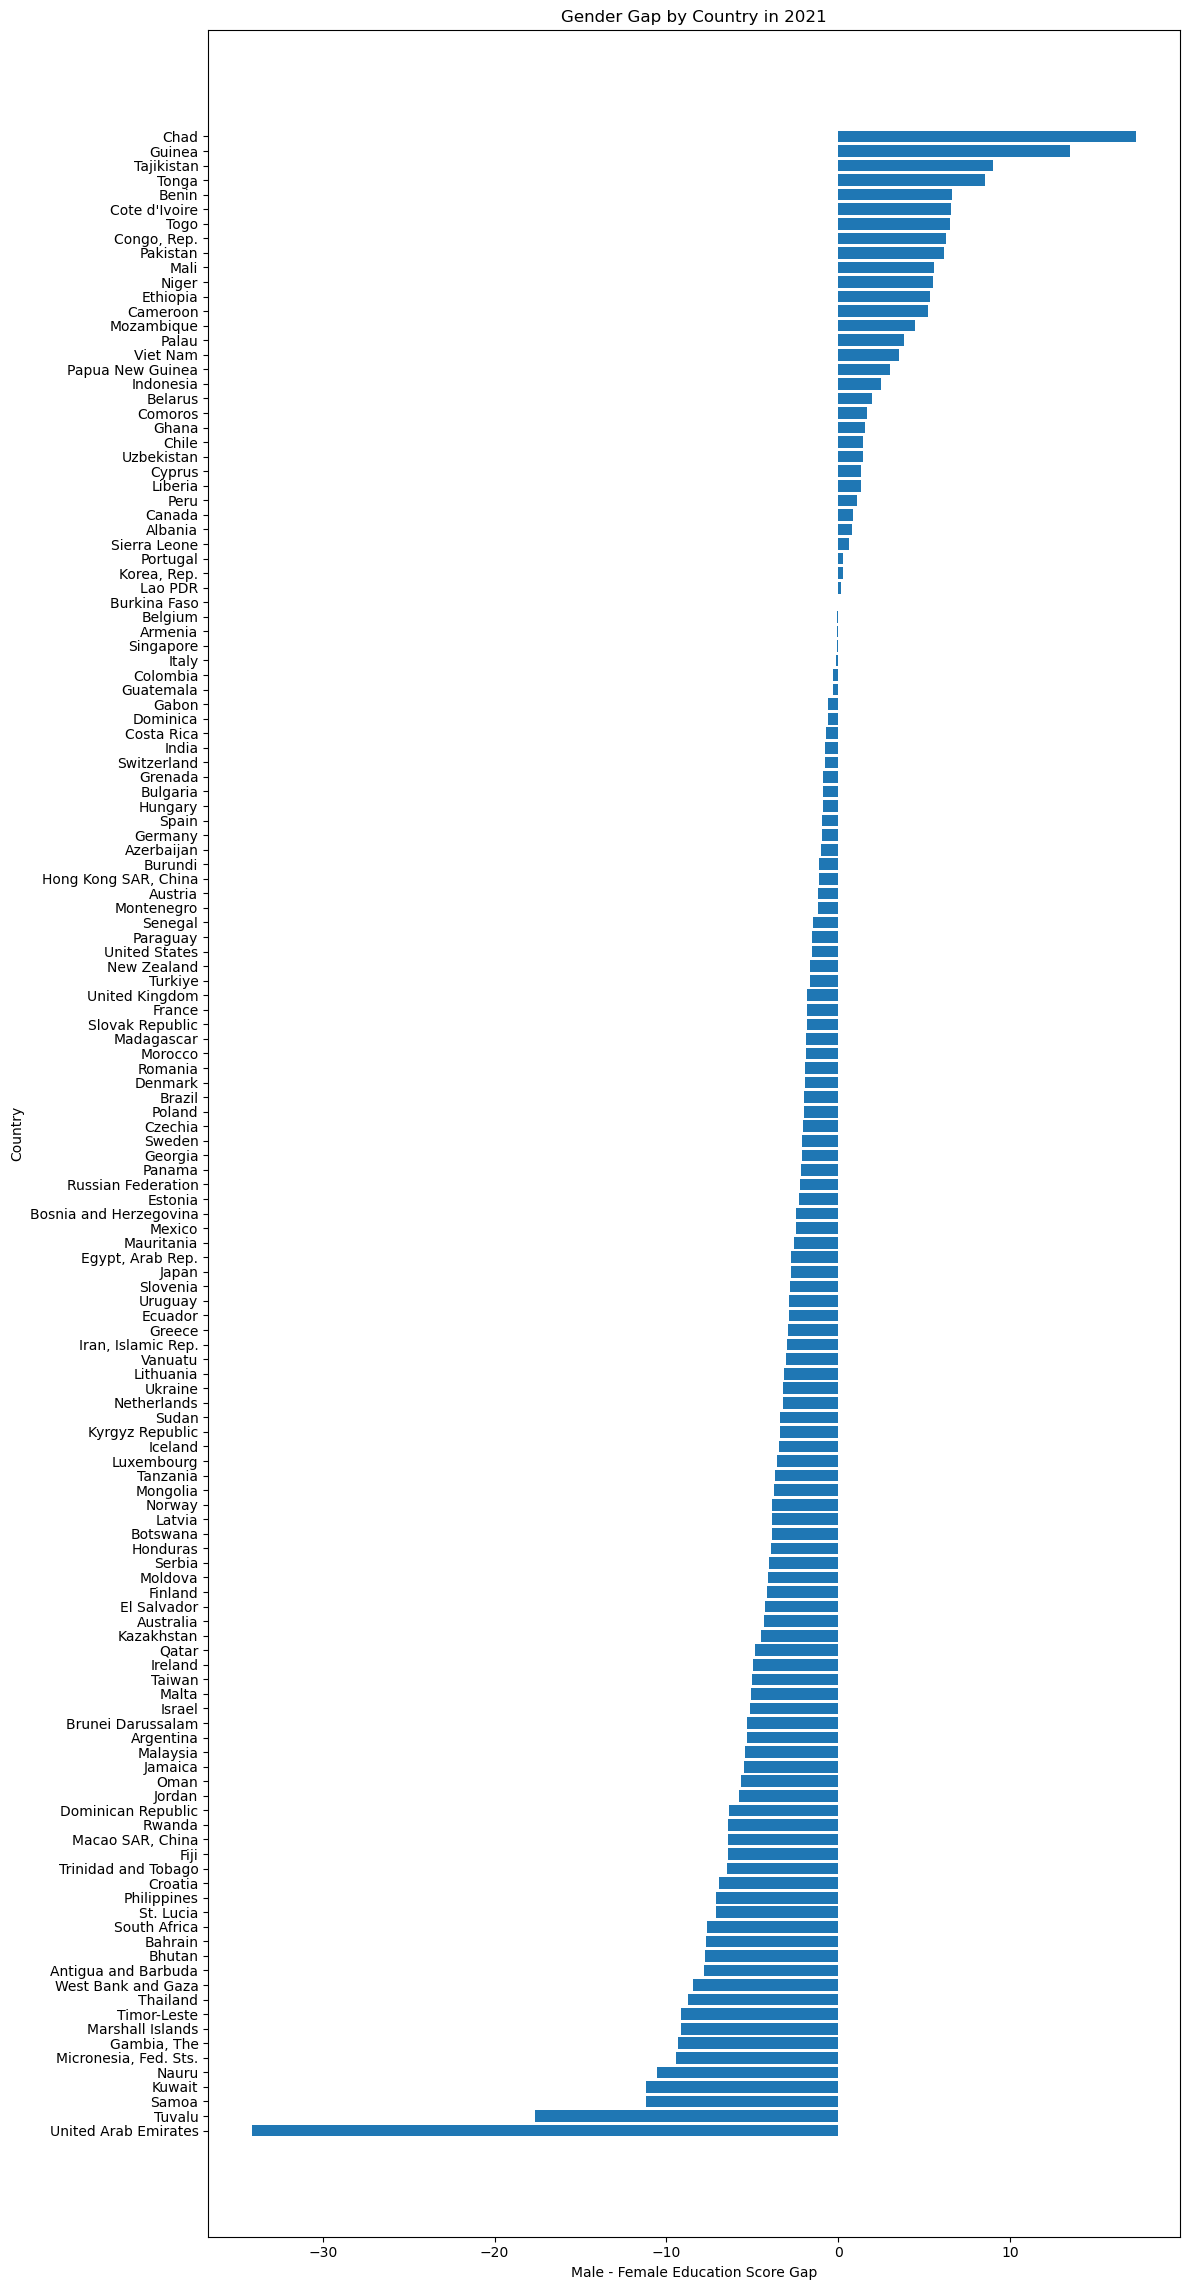

In [65]:
# Country-Level Barplot for the Most Recent Year
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
latest_data_sorted = latest_data.sort_values('Gender_Gap')

plt.figure(figsize=(12,23))
plt.barh(latest_data_sorted['Country'], latest_data_sorted['Gender_Gap'])
plt.title(f'Gender Gap by Country in {latest_year}')
plt.xlabel('Male - Female Education Score Gap')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

This bar plot shows the average global gender gap in education rights year by year. A declining trend would suggest global progress toward gender parity, while fluctuations would indicate uneven improvements.


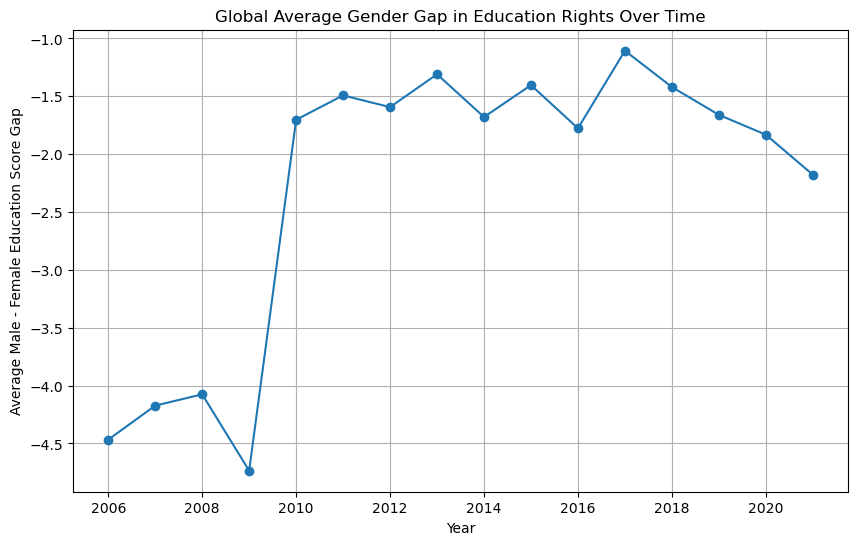

In [47]:
# Global Trend: Average Gender Gap Over Time
global_trend = df.groupby('Year')['Gender_Gap'].mean()
plt.figure(figsize=(10,6))
plt.plot(global_trend.index, global_trend.values, marker='o')
plt.title('Global Average Gender Gap in Education Rights Over Time')
plt.xlabel('Year')
plt.ylabel('Average Male - Female Education Score Gap')
plt.grid(True)
plt.show()

This line plot shows the global average gender gap in education rights over time. The overall downward trend reflects a gradual worldwide movement toward gender parity, although fluctuations suggest uneven progress year to year.


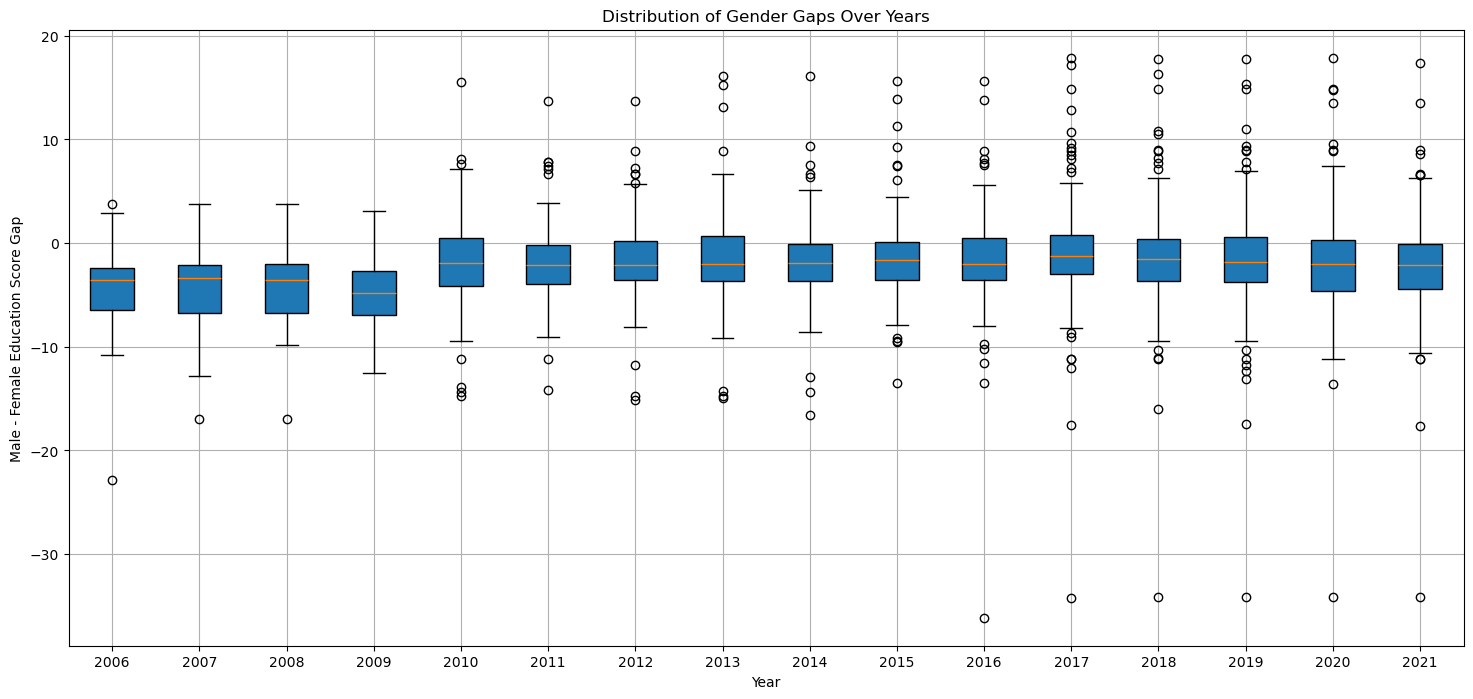

In [53]:
#Boxplots of Gender Gaps Over Years
years = sorted(df['Year'].unique())
plt.figure(figsize=(18, 8))
data_to_plot = [df[df['Year'] == year]['Gender_Gap'] for year in years]
plt.boxplot(data_to_plot, tick_labels=years, patch_artist=True)
plt.title('Distribution of Gender Gaps Over Years')
plt.xlabel('Year')
plt.ylabel('Male - Female Education Score Gap')
plt.grid(True)
plt.show()

This boxplot shows the distribution of gender gaps across all countries for each year, highlighting persistent disparities even as global averages improve.


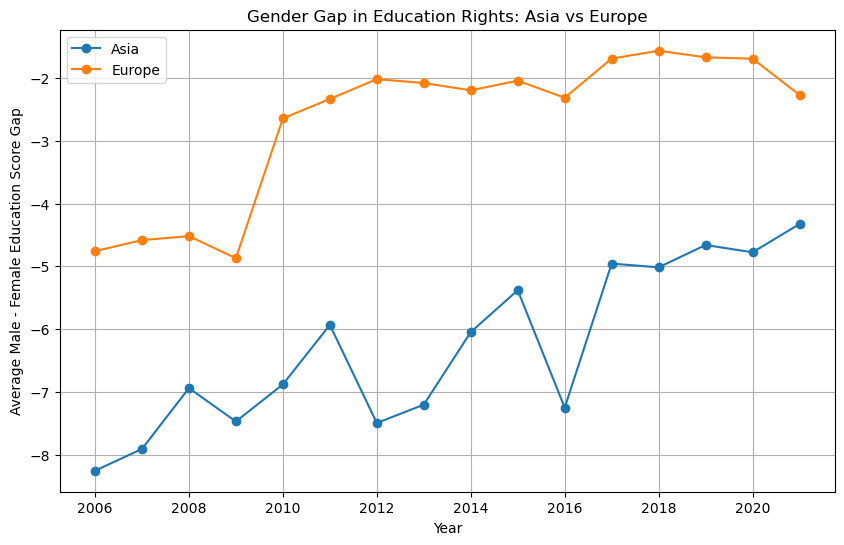

In [54]:
# Regional Trend: Asia vs Europe
# Define Regions
asia_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 
    'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 
    'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 
    'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 
    'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 
    'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
]

europe_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia',
    'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
    'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
]
df['Region'] = df['Country'].apply(
    lambda x: 'Asia' if x in asia_countries else ('Europe' if x in europe_countries else 'Other')
)

regional_df = df[df['Region'].isin(['Asia', 'Europe'])]
regional_gap = regional_df.groupby(['Region', 'Year'])['Gender_Gap'].mean().unstack('Region')

plt.figure(figsize=(10,6))
for region in ['Asia', 'Europe']:
    plt.plot(regional_gap.index, regional_gap[region], marker='o', label=region)
plt.title('Gender Gap in Education Rights: Asia vs Europe')
plt.xlabel('Year')
plt.ylabel('Average Male - Female Education Score Gap')
plt.legend()
plt.grid(True)
plt.show()


This line plot compares the average gender gap between Asia and Europe over time. Europe consistently exhibits smaller gender gaps compared to Asia, although both regions show gradual improvements.


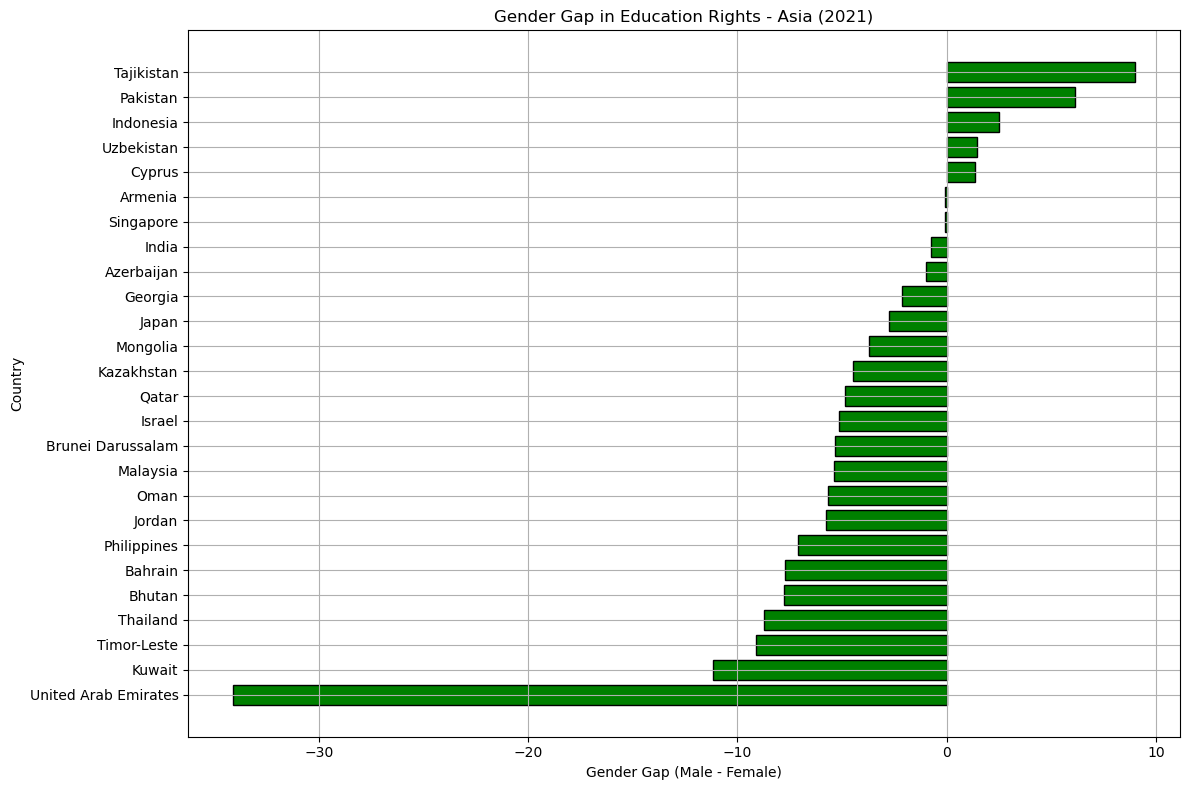

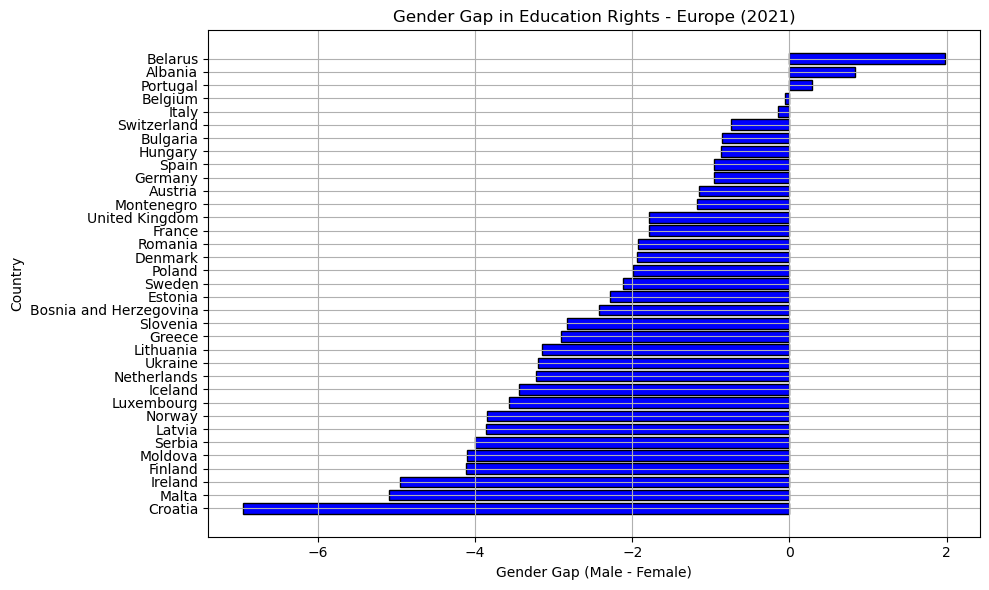

In [55]:
# Extract Latest Year Data
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]

# Create Bar Plot for Asia
asia_data = latest_data[latest_data['Region'] == 'Asia'].sort_values('Gender_Gap')
plt.figure(figsize=(12,8))
plt.barh(asia_data['Country'], asia_data['Gender_Gap'], color='green', edgecolor='black')
plt.title(f'Gender Gap in Education Rights - Asia ({latest_year})')
plt.xlabel('Gender Gap (Male - Female)')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create Bar Plot for Europe
europe_data = latest_data[latest_data['Region'] == 'Europe'].sort_values('Gender_Gap')
plt.figure(figsize=(10,6))
plt.barh(europe_data['Country'], europe_data['Gender_Gap'], color='blue', edgecolor='black')
plt.title(f'Gender Gap in Education Rights - Europe ({latest_year})')
plt.xlabel('Gender Gap (Male - Female)')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()

- The first bar plot displays gender gaps at the country level within Asia, revealing significant variation and persistent inequalities.

- The second bar plot displays gender gaps at the country level within Europe, showing that while gaps are generally smaller, disparities between countries remain.

In [56]:
# Identify Countries with Largest Improvements
early_year = df['Year'].min()
late_year = df['Year'].max()

gap_start = df[df['Year'] == early_year][['Country', 'Gender_Gap']].set_index('Country')
gap_end = df[df['Year'] == late_year][['Country', 'Gender_Gap']].set_index('Country')

gap_change = (gap_start['Gender_Gap'] - gap_end['Gender_Gap']).dropna()
gap_change_sorted = gap_change.sort_values()

# Top 5 countries improving most
print("Top 5 Countries with Greatest Improvement Toward Gender Parity:")
print(gap_change_sorted.head(5))

# Top 5 countries worsening most
print("\nTop 5 Countries with Worsening Gender Gap:")
print(gap_change_sorted.tail(5))

Top 5 Countries with Greatest Improvement Toward Gender Parity:
Country
Qatar      -17.996987
Estonia     -7.561618
Iceland     -7.359352
Spain       -5.977873
Slovenia    -5.727040
Name: Gender_Gap, dtype: float64

Top 5 Countries with Worsening Gender Gap:
Country
Netherlands    2.032493
Taiwan         2.477595
Finland        2.500075
Switzerland    4.488733
Turkiye        4.537724
Name: Gender_Gap, dtype: float64


## Results

1. The global trend in gender equality in education rights shows slight improvement trend over time, as depicted in the bar plot of average gender gaps by year. Despite general progress, the year-to-year fluctuations suggest that movement toward parity has not been entirely smooth. A single-line plot of the global gender gap over time confirms a gradual but inconsistent trend toward greater equality.

2. Comparing Asia and Europe more closely through a two-line plot, Europe consistently maintains smaller gender gaps relative to Asia, although both regions exhibit gradual progress over the past fifteen years. A global boxplot analysis of gender gaps over time further emphasizes that while the world average improves, there remains substantial variation in gender gap outcomes among countries each year, reflecting persistent global disparities.

3. Finally, a breakdown at the country level shows persistent disparities within both Asia and Europe. Bar plots of gender gaps by country reveal that although Europe generally outperforms Asia, significant country-level gaps remain within each region. This layered analysis indicates that while the world is moving toward gender parity in education rights, progress is uneven across regions and countries, and substantial inequalities still need to be addressed.